# Парсинг и обработка данных

<AxesSubplot:xlabel='Date'>

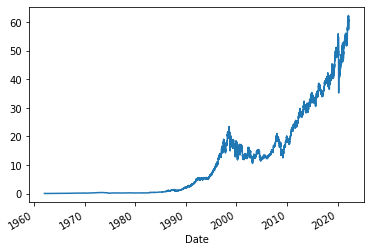

In [1]:
!pip install yfinance
import yfinance as yf
tickerSymbol = 'KO'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='max')
tickerDf.Close.plot()

# Генерация лаговых фичей

In [2]:
prediction_window = 10
prediction_columns = ['Close']
for i in range(1,prediction_window+1):
  col_name = f'shift_{i}'
  prediction_columns.append(col_name)
  tickerDf[col_name] = tickerDf.Close.shift(i)
data = tickerDf[prediction_columns]
data = data.dropna()
data.head()

,Close,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Date,,,,,,,,,,,
1962-01-16,0.048058,0.048934,0.049434,0.049810,0.049309,0.049059,0.048183,0.048684,0.049810,0.049434,0.050561
1962-01-17,0.046556,0.048058,0.048934,0.049434,0.049810,0.049309,0.049059,0.048183,0.048684,0.049810,0.049434
1962-01-18,0.045617,0.046556,0.048058,0.048934,0.049434,0.049810,0.049309,0.049059,0.048183,0.048684,0.049810
1962-01-19,0.047057,0.045617,0.046556,0.048058,0.048934,0.049434,0.049810,0.049309,0.049059,0.048183,0.048684
1962-01-22,0.047432,0.047057,0.045617,0.046556,0.048058,0.048934,0.049434,0.049810,0.049309,0.049059,0.048183


# Стандартное разбиение данных и Линейная регрессия. Подсчет метрик MSE, MAE, MAPE. 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
X = data[prediction_columns[:-1]].values
y = data[prediction_columns [-1]].values.reshape(-1, 1)
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42,shuffle=False)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
MSE = mean_squared_error(regressor.predict(x_test),y_test)
MAE = mean_absolute_error(regressor.predict(x_test),y_test)
MAPE = mean_absolute_percentage_error(regressor.predict(x_test),y_test)
print(f"MSE = {MSE}")
print(f"MAE = {MAE}")
print(f"MAPE = {MAPE}")

MSE = 0.1337431874237075
MAE = 0.21953101139337902
MAPE = 0.008098989540590762


# Преобразование бокса-кокса


<AxesSubplot:xlabel='Date'>

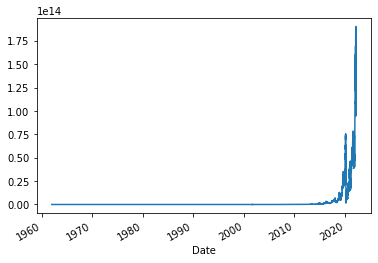

In [4]:
import pandas as pd
from scipy.stats import boxcox
data = tickerDf
transformed, lambda_ = boxcox(data ['Close'].values)
data['box_cox'] = transformed
data.box_cox.plot()

# Дифференцирование временного ряда

<AxesSubplot:xlabel='Date'>

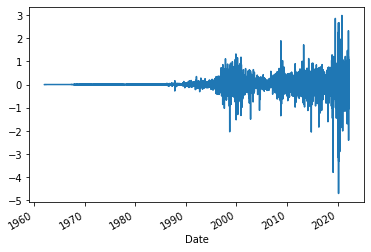

In [5]:
data['diff'] = data.Close.diff()
data['diff'].plot()

# Долевое дифференцирование временного ряда

<AxesSubplot:xlabel='Date'>

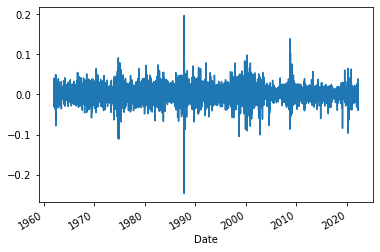

In [6]:
data['pct_change'] = data.Close.pct_change()
data ['pct_change'].plot()

# Стандартизация (z-преобразование)

<AxesSubplot:xlabel='Date'>

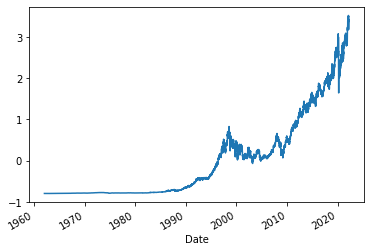

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['scaled'] = scaler.fit_transform(data.Close.values. reshape(-1,1))
data['scaled'].plot()

# Нормализация

<AxesSubplot:xlabel='Date'>

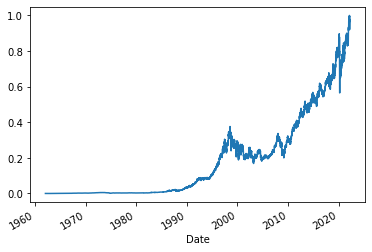

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['min max_scaled'] = scaler.fit_transform(data.Close.values.reshape(-1,1))
data['min max_scaled'].plot()